# 绘制欧姆表表头

---

> 这是电表的改装————绘制欧姆表头的代码，大家只需要把数据代入区的数据替换成自己的就可以啦。
>
> **注意：**
>    1. 数据代入区中的 `resistances` 和 `ticks` 是表格里的电阻和刻度，请按照顺序输入。
>
>    2. 记得将图片的下半部分隐去。

### 效果展示：

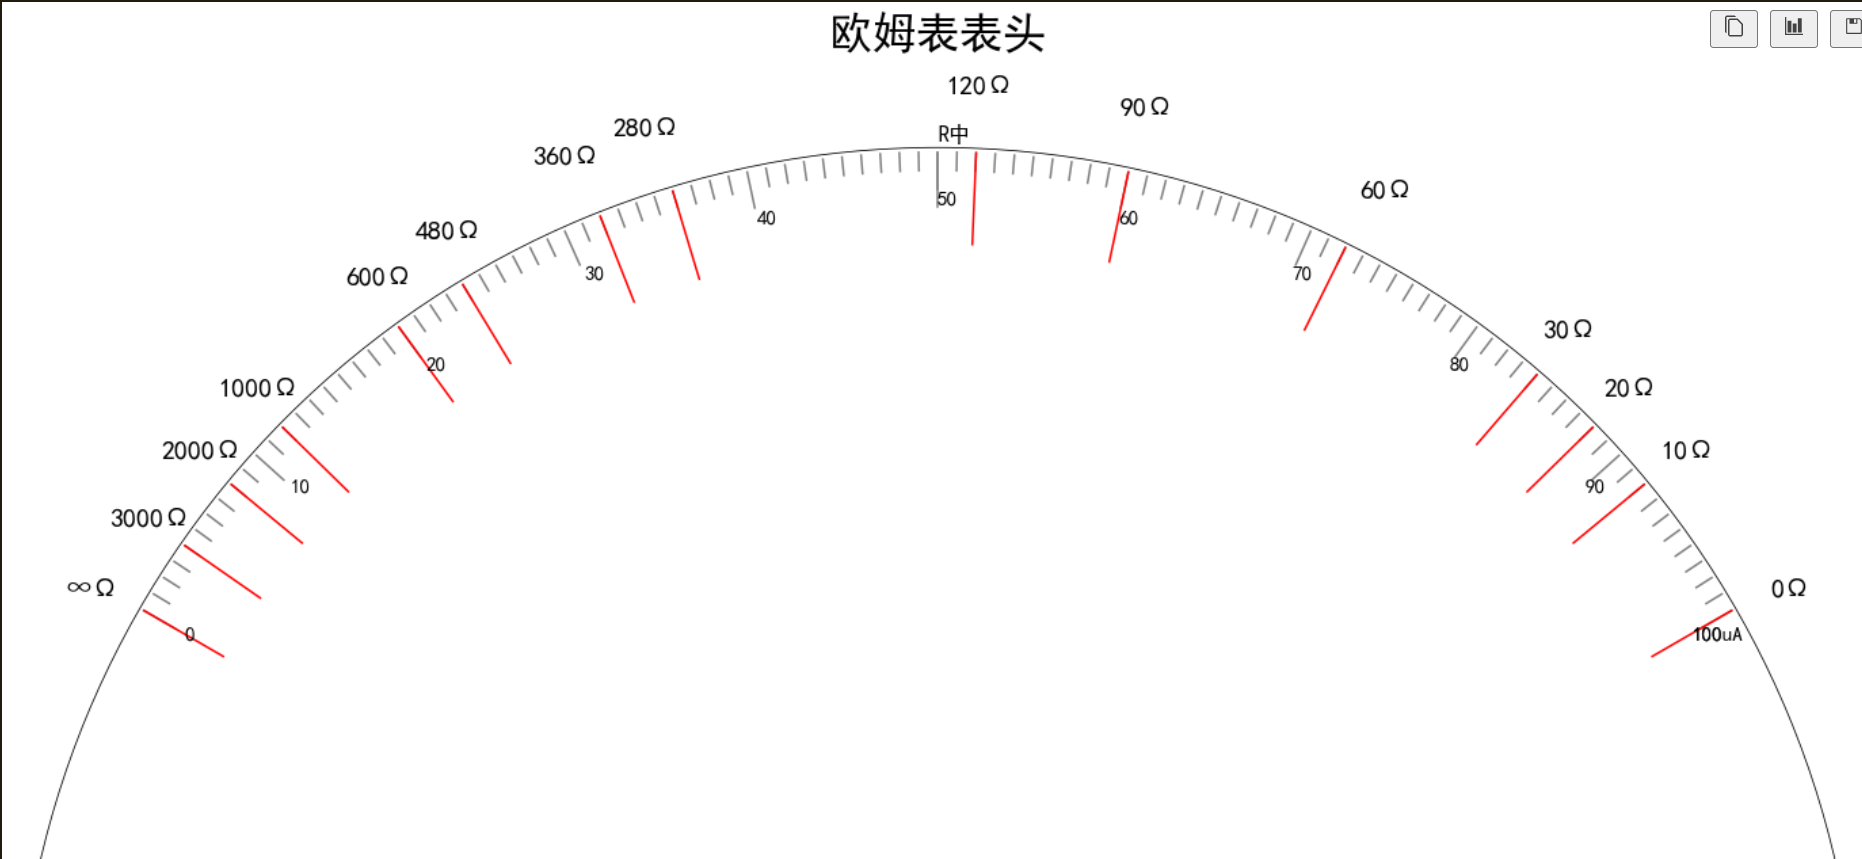

### 代码部分：

**1. 导入库**

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.sans-serif"] = ["Simhei"]  # 显示中文
plt.rcParams["axes.unicode_minus"] = False  # 显示负号

**2. 数据代入区**

In [10]:
resistances = [0, 10, 20, 30, 60, 90, 120, 280, 360, 480, 600, 1000, 2000, 3000]
ticks = [25, 23, 21.2, 19.7, 16.1, 13.8, 12.0, 7, 5.9, 4.9, 4, 2.6, 1.4, 1]

**3. 绘制欧姆表表头**

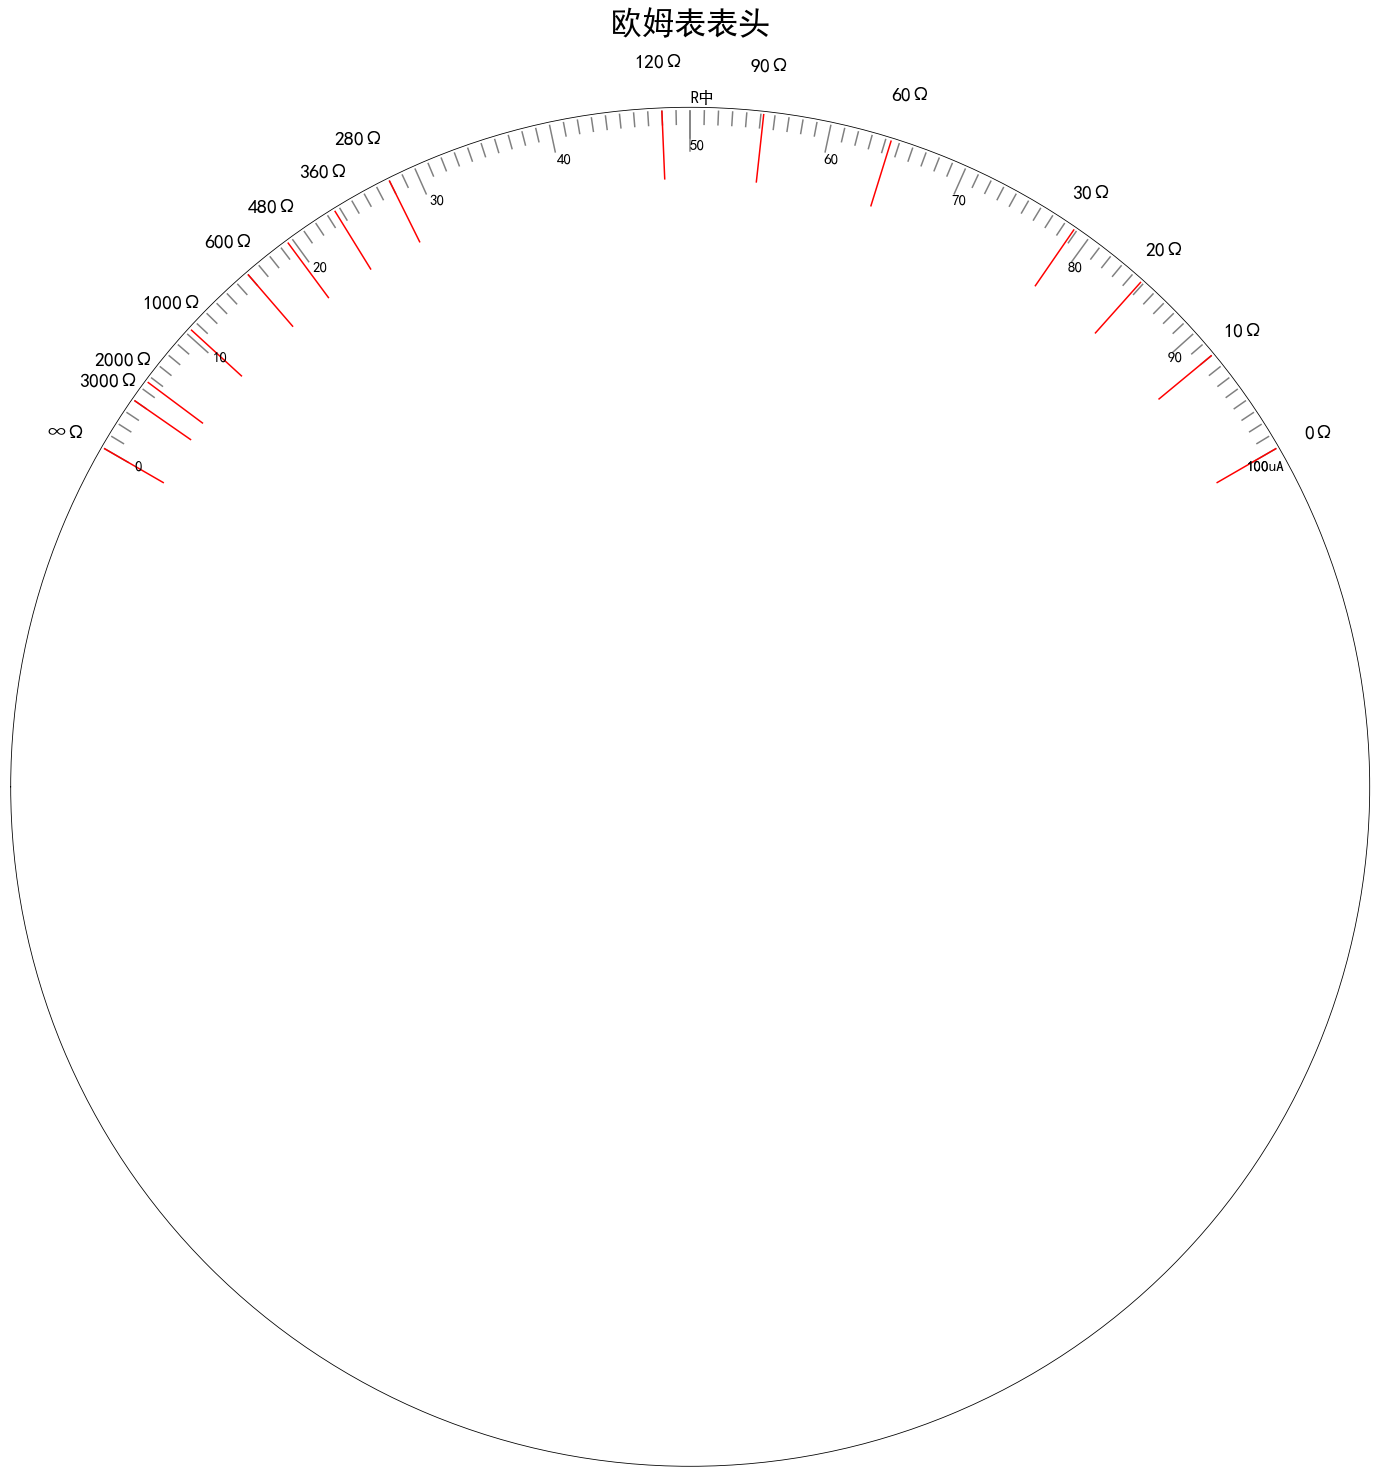

In [11]:
resistances += ["∞"]
ticks += [0]

# 设置画布
fig, ax = plt.subplots(figsize=(25, 25), subplot_kw={"projection": "polar"})

# 计算角度
angles = [i / 25 * 2 / 3 * np.pi + np.pi * 1 / 6 for i in ticks]

# 刻一百格
hundred_ticks = list(range(0, 101))
hundred_angles = [i / 100 * 2 / 3 * np.pi + np.pi * 1 / 6 for i in hundred_ticks]

# 绘制刻度线
for angle, tick in zip(hundred_angles, hundred_ticks):
    if tick % 10 == 0:
        ax.plot([angle, angle], [0.96, 1], color="gray")

        if tick == 100:
            ax.text(angle, 0.95, f"{tick}uA", verticalalignment="center", fontsize=15)

        ax.text(angle, 0.95, f"{tick}", verticalalignment="center", fontsize=15)

        if tick == 50:
            ax.plot([angle, angle], [0.94, 1], color="gray")
            ax.text(angle, 1.02, "R中", verticalalignment="center", fontsize=16)
    else:
        ax.plot([angle, angle], [0.98, 1], color="gray")

# 绘制刻度线
for angle, tick in zip(angles, ticks):
    ax.plot([angle, angle], [0.9, 1], color="red")
    if angle < np.pi / 3:
        alignment = "left"
    elif angle > 2 * np.pi / 3:
        alignment = "right"
    else:
        alignment = "center"
    ax.text(
        angle,
        1.1,
        f"\n\n{resistances[ticks.index(tick)]}Ω",
        horizontalalignment=alignment,
        verticalalignment="center",
        fontsize=20,
    )

# 去除默认的极坐标网格和标签
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])

# 设置极坐标起始角度
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)

ax.set_title("欧姆表表头", fontsize=32, fontweight="bold", color="black")
plt.show()